<a href="https://colab.research.google.com/github/among5094/Big-Data-Integrated-Analysis/blob/main/week14_CH12_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A1%9C_%EC%9D%BD%EB%8A%94%EC%84%B8%EC%83%81/week14_CH12_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A1%9C_%EC%9D%BD%EB%8A%94%EC%84%B8%EC%83%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CH12 텍스트로 읽는 세상

날짜: 06월 09일 월요일


### CH12.01 자연어 처리

In [1]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 17.3 MB/s eta 0:00:00


In [2]:
!pip install wordcloud

In [3]:
!pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: /usr/local/lib/python3.11/dist-packages
Requires: JPype1, lxml, numpy
Required-by: 


In [4]:
# Okt 분석기 생성
from konlpy.tag import Okt
okt = Okt()

In [6]:
# # 형태소 토큰화하기: morphs()
token = okt.morphs('달이 참 예쁘다고')
print(token)

['달이', '참', '예쁘다고']


In [7]:
# 형태소 토큰화하기: pos
from konlpy.tag import Okt
okt = Okt()

sentence_tag = okt.pos('달이 참 예쁘다고')
print(sentence_tag)

sentence_tag = okt.pos('달이 참 예쁘다고', join=True)
print(sentence_tag)

[('달이', 'Noun'), ('참', 'Verb'), ('예쁘다고', 'Adjective')]
['달이/Noun', '참/Verb', '예쁘다고/Adjective']


In [8]:
# 형태소 토큰화하기: phrases()
from konlpy.tag import Okt
okt = Okt()

sentence = okt.phrases('달이 참 예쁘다고')
sentence

['달이']

(2) 토큰화 실습

In [10]:
# pos()로 형태소 분석
from konlpy.tag import Okt
okt = Okt()

text = '이승윤 숨고 싶을 땐 다락이 되어 즐겨야 죽고 싶을 땐 나락이 되어 즐겨야 울고 싶은 만큼 허송 세월 해 즐겨야 진심이 버거울 땐 우리 가면무도회를 열자'
sentence_tag = okt.pos(text)  # 형태소 분석하기
sentence_tag

[('이승윤', 'Noun'),
 ('숨고', 'Verb'),
 ('싶을', 'Verb'),
 ('땐', 'Noun'),
 ('다락', 'Noun'),
 ('이', 'Josa'),
 ('되어', 'Verb'),
 ('즐겨야', 'Verb'),
 ('죽고', 'Verb'),
 ('싶을', 'Verb'),
 ('땐', 'Noun'),
 ('나락', 'Noun'),
 ('이', 'Josa'),
 ('되어', 'Verb'),
 ('즐겨야', 'Verb'),
 ('울', 'Noun'),
 ('고', 'Josa'),
 ('싶은', 'Verb'),
 ('만큼', 'Noun'),
 ('허송', 'Noun'),
 ('세월', 'Noun'),
 ('해', 'Noun'),
 ('즐겨야', 'Verb'),
 ('진심', 'Noun'),
 ('이', 'Josa'),
 ('버거울', 'Adjective'),
 ('땐', 'Noun'),
 ('우리', 'Noun'),
 ('가면무도회', 'Noun'),
 ('를', 'Josa'),
 ('열자', 'Noun')]

In [12]:
# collection.counter()로 빈도수 구하기
import collections

text = '그날 눈사람은 텅 빈 욕조에 누워 있었다. 뜨거운 물을 틀기 전에 그는 더 살아야 하는지 말아야 하는지 곰곰이 생각해 보았다. 더 살아야 할 이유가 없다는 것이 자살의 이유가 될 수는 없었으며 죽어야 할 이유가 없다는 것이 사는 이유 또한 될 수 없었다. 죽어야 할 이유도 없었고 더 살아야 할 이유도 없었다.아무런 이유 없이 텅 빈 욕조에 혼자 누워 있을 때 뜨거운 물과 찬물 중에서 어떤 물을 틀어야 하는 것일까. 눈사람은 그 결과는 같은 것이라고 생각했다. 뜨거운 물에는 빨리 녹고 찬물에는 좀 천천히 녹겠지만 녹아 사라진다는 점에서는 다를 게 없었다.나는 따뜻한 물에 녹고 싶다. 오랫동안 너무 춥게만 살지 않았는가. 눈사람은 온수를 틀고 자신의 몸이 점점 녹아 물이 되는 것을 지켜보다 잠이 들었다. 욕조에서는 무럭무럭 김이 피어올랐다.'

sentece_tag = okt.pos(text)
sentece_tag

adj_list = []
for word, tag in sentece_tag:
    if tag in ['Noun', 'Adjective']:
        adj_list.append(word)

counts = collections.Counter(adj_list)
tag = counts.most_common(2)

print(tag)


[('이유', 7), ('물', 5)]


### CH12.02 워드클라우드

##### (1) 라이브러리 설치

In [13]:
!pip install wordcloud

In [14]:
import matplotlib.pyplot as plt

In [15]:
!apt-get install fonts-nanum
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (38.6 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


##### (2) 한글 글꼴 설치

In [16]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

##### (3) 텍스트 가져오기

In [18]:
f = open("/content/drive/MyDrive/data/달이참예쁘다고.txt", 'r')  # 파일 열기
str = ''
lines = f.readlines()  # 파일의 모든 줄을 읽어오기(리스트로 저장됨)
for line in lines:  # 한 줄씩 읽어오기
    # print(line)
    line = line.strip()  # 줄 바꿈(\n) 문자 제거
    str += line  # 문자열에 계속 추가하기
f.close()  # 파일 닫기
# print(str)

##### (4) 품사 태깅하기

In [19]:
# 품사를 태깅하여 명사와 형용사 형태소만 추출하기
sentece_tag = okt.pos(str)  # 형태소 분석하기
sentece_tag

[('이승윤', 'Noun'),
 ('밤', 'Noun'),
 ('하늘', 'Noun'),
 ('빛나는', 'Verb'),
 ('수만', 'Noun'),
 ('가지', 'Noun'),
 ('것', 'Noun'),
 ('들', 'Suffix'),
 ('이', 'Josa'),
 ('이미', 'Adverb'),
 ('죽어', 'Verb'),
 ('버린', 'Verb'),
 ('행성', 'Noun'),
 ('의', 'Josa'),
 ('잔', 'Noun'),
 ('해라면', 'Verb'),
 ('고개', 'Noun'),
 ('를', 'Josa'),
 ('들어', 'Verb'),
 ('경의', 'Noun'),
 ('를', 'Josa'),
 ('표', 'Noun'),
 ('하기', 'Verb'),
 ('보단', 'Verb'),
 ('허리', 'Noun'),
 ('를', 'Josa'),
 ('숙여', 'Verb'),
 ('흙', 'Noun'),
 ('을', 'Josa'),
 ('한', 'Verb'),
 ('웅큼', 'Noun'),
 ('집어', 'Verb'),
 ('들래', 'Verb'),
 ('방', 'Noun'),
 ('안', 'Noun'),
 ('에', 'Josa'),
 ('가득히', 'Adjective'),
 ('내', 'Noun'),
 ('가', 'Josa'),
 ('사랑', 'Noun'),
 ('을', 'Josa'),
 ('했던', 'Verb'),
 ('사람', 'Noun'),
 ('들', 'Suffix'),
 ('이', 'Josa'),
 ('액자', 'Noun'),
 ('안', 'Noun'),
 ('에서', 'Josa'),
 ('빛나고', 'Verb'),
 ('있어', 'Adjective'),
 ('죽어서', 'Verb'),
 ('이름', 'Noun'),
 ('을', 'Josa'),
 ('어딘가', 'Noun'),
 ('남기기', 'Verb'),
 ('보단', 'Verb'),
 ('살아서', 'Verb'),
 ('그', 'Noun'),
 ('들', 'Suffi

In [20]:
sentece_tag = okt.pos(str)  # 형태소 분석하기
sentece_tag

adj_list = []
for word, tag in sentece_tag:
    if tag in ['Noun', 'Adjective']:
        adj_list.append(word)

# 10개 출력하기
adj_list[:10]

['이승윤', '밤', '하늘', '수만', '가지', '것', '행성', '잔', '고개', '경의']

##### (5) 동일한 단어의 빈도수 구하기

In [21]:
# 동일한 단어 빈도수 구하기
counts = collections.Counter(adj_list)
tag = counts.most_common(10)
tag

[('있어', 3),
 ('이름', 3),
 ('땐', 3),
 ('가지', 2),
 ('안', 2),
 ('영원히', 2),
 ('노', 2),
 ('저을', 2),
 ('순', 2),
 ('없지만', 2)]

##### (6) wordcloud 생성

In [22]:
# 워드클라우드 생성
from wordcloud import WordCloud

wc = WordCloud(font_path=font_path, background_color='skyblue', max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tag))


##### (7) matplotlib으로 시각화하기

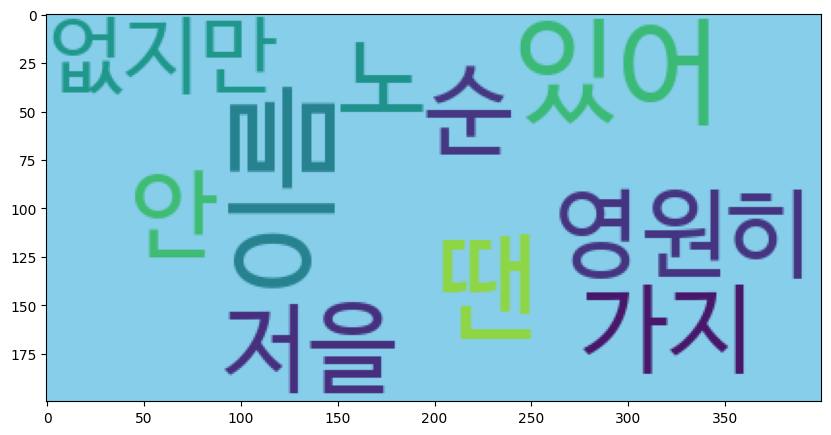

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(cloud)

### CH12.03 자연어 처리 실습
- 뉴스기사로 워드클라우드 만들기

##### (1) 필요한 라이브러리 불러오기

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud

##### (2) 데이터 읽어오기

In [25]:
df=pd.read_excel('/content/drive/MyDrive/data/chap12_실습2.xlsx')
df.head()

,일자,언론사,본문
0,20220924,파이낸셜뉴스,9월 30일부터 10월 2일까지 갓바위문화타운 일원에서 열려 \n \n \n【파이낸...
1,20220923,한국일보,정부가 야외에서의 마스크 착용 의무를 26일부터 전면 해제한다고 밝히면서 내달 열리...
2,20220923,한국일보,야외 공연 즐기기 좋은 가을철을 맞아 대형 음악 축제가 이어진다. 팬데믹 기간 정상...
3,20220922,광주매일신문,우리나라 대중음악을 빛내는 별들이 ‘목포뮤직플레이’에 대거 출연해 목포의 가을을 장...
4,20220921,경향신문,50대 여성 A씨는 지난 8일 유명 트로트 가수의 티켓을 판매한다는 게시글을 중고품...


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      25 non-null     int64 
 1   언론사     25 non-null     object
 2   본문      25 non-null     object
dtypes: int64(1), object(2)
memory usage: 732.0+ bytes


In [27]:
df.isnull().sum()

,0
일자,0
언론사,0
본문,0


#####  (3) 데이터 전처리 : 결측치 제거

In [28]:
print(df.isnull().sum())

일자     0
언론사    0
본문     0
dtype: int64


##### (4) 한글과 공백을 제외한 모든 문자 제거

In [29]:
df['정규화본문'] = df['본문'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
df.head()

,일자,언론사,본문,정규화본문
0,20220924,파이낸셜뉴스,9월 30일부터 10월 2일까지 갓바위문화타운 일원에서 열려 \n \n \n【파이낸...,9월 30일부터 10월 2일까지 갓바위문화타운 일원에서 열려 \n \n \n【파이낸...
1,20220923,한국일보,정부가 야외에서의 마스크 착용 의무를 26일부터 전면 해제한다고 밝히면서 내달 열리...,정부가 야외에서의 마스크 착용 의무를 26일부터 전면 해제한다고 밝히면서 내달 열리...
2,20220923,한국일보,야외 공연 즐기기 좋은 가을철을 맞아 대형 음악 축제가 이어진다. 팬데믹 기간 정상...,야외 공연 즐기기 좋은 가을철을 맞아 대형 음악 축제가 이어진다. 팬데믹 기간 정상...
3,20220922,광주매일신문,우리나라 대중음악을 빛내는 별들이 ‘목포뮤직플레이’에 대거 출연해 목포의 가을을 장...,우리나라 대중음악을 빛내는 별들이 ‘목포뮤직플레이’에 대거 출연해 목포의 가을을 장...
4,20220921,경향신문,50대 여성 A씨는 지난 8일 유명 트로트 가수의 티켓을 판매한다는 게시글을 중고품...,50대 여성 A씨는 지난 8일 유명 트로트 가수의 티켓을 판매한다는 게시글을 중고품...


##### (5) 형태소로 토큰화 하여 명사와 형용사 추출한 후에 빈도수 출력

In [30]:
temp_list = []
for sentence in df['정규화본문']:
    s_list = okt.pos(sentence)
    for word, tag in s_list:
        if tag in ['Noun', 'Adjective']:
            temp_list.append(word)

counts = collections.Counter(temp_list)
tag = counts.most_common(50)
tag

[('뮤직', 25),
 ('목포', 22),
 ('이승윤', 19),
 ('플레이', 17),
 ('문화', 16),
 ('가수', 16),
 ('음악', 11),
 ('축제', 10),
 ('공연', 10),
 ('투표', 10),
 ('갓바위', 9),
 ('목포시', 9),
 ('지난', 9),
 ('타운', 8),
 ('코로나', 8),
 ('전국', 8),
 ('통해', 8),
 ('의', 7),
 ('티켓', 7),
 ('스타', 7),
 ('수', 7),
 ('더', 7),
 ('일원', 6),
 ('있다', 6),
 ('계획', 6),
 ('경연', 6),
 ('온라인', 6),
 ('진행', 6),
 ('이', 6),
 ('팩트', 6),
 ('어워즈', 6),
 ('뮤지션', 6),
 ('추진', 6),
 ('대표', 5),
 ('최초', 5),
 ('대회', 5),
 ('마름모', 5),
 ('를', 5),
 ('보고', 5),
 ('기자', 4),
 ('전남', 4),
 ('국내', 4),
 ('페스티벌', 4),
 ('씨', 4),
 ('브랜드', 4),
 ('파워', 4),
 ('위', 4),
 ('표', 4),
 ('방송', 4),
 ('있는', 4)]

##### (6) 워드클라우드 생성 및 시각화

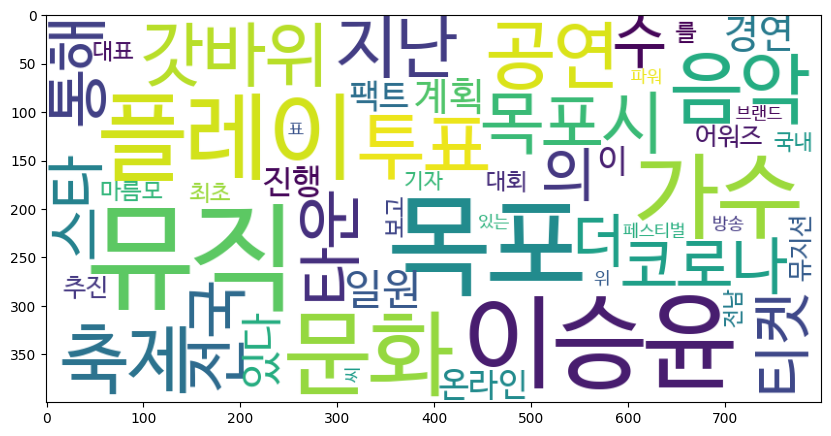

In [31]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud

wc = WordCloud(font_path=font_path, background_color='white', max_font_size=60, scale=2.0)  # scale은 이미지의 크기를 결정
cloud = wc.generate_from_frequencies(dict(tag))

plt.figure(figsize=(10, 8))
plt.imshow(cloud)


##### (7) 원하는 모양으로 워드클라우드 생성 및 시각화

In [32]:
import numpy as np
from PIL import Image

img = Image.open('/content/검은배경.jpg')
img_array = np.array(img)

wc = WordCloud(
    font_path=font_path,
    width=400,
    height=400,
    scale=2.0,
    max_font_size=250,
    mask=img_array
)

gen = wc.generate_from_frequencies(dict(tag))

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(gen)


FileNotFoundError: [Errno 2] No such file or directory: '/content/검은배경.jpg'